# Filter example

This example shows basic filtering and basic views of the fourier transform of a signal. 


In [44]:
%pylab inline
import numpy as np
#import util
import scipy.signal

Populating the interactive namespace from numpy and matplotlib


In [17]:
# first we create time
Fs = 1000.0 # Our sampling rate, "how finely we divide time"
N = 1000 # number of samples
t = np.arange(N)/Fs

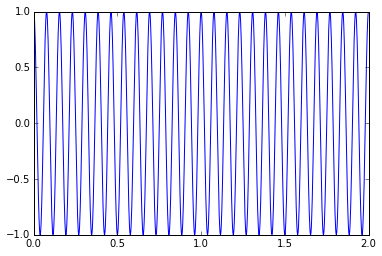

In [28]:
# a basic signal
freq = 13.0 # Hz
y = np.cos(t * 2*np.pi * freq)
pylab.plot(t, y)

(-50, 50)

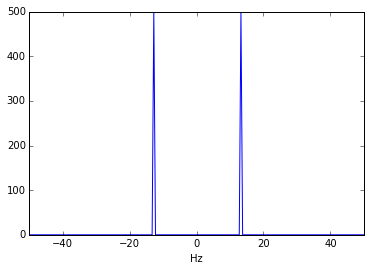

In [31]:
# let's look at the fourier transform of that signal
def ft(x, Fs):
    """
    Take the fourier transform of a signal; 
    returns the frequences at which we evaluated the signal
    
    We'll worry about the exact meaning of these commands later when
    we discuss the implementation details of the FFT
    """
    
    Xjw = np.fft.fftshift(np.fft.fft(x))
    w = np.linspace(-Fs/2, Fs/2, len(x))
    
    return w, Xjw

w, Y = ft(y, Fs)
pylab.plot(w, np.abs(Y))
pylab.xlabel("Hz")
pylab.xlim(-50, 50)

# Impulse response

We create a signal with two impulses, and then create an impulse response 

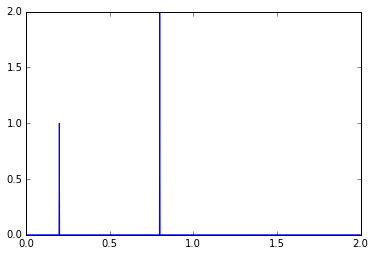

In [32]:
# convolution
x = np.zeros_like(t)
x[100] = 1.0 
x[400] = 2.0 

pylab.plot(t, x)



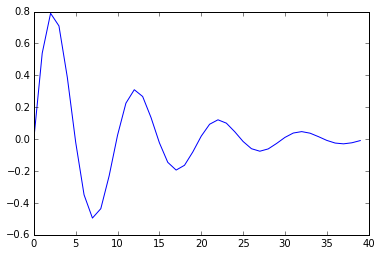

In [40]:
# impulse response -- this is any function we want at the moment
# right now we're using a dampened sinusoid
ht = np.linspace(0, np.pi, 100)[:40]
h = np.sin(ht*20)  * np.exp(-ht*3)
pylab.plot(h)

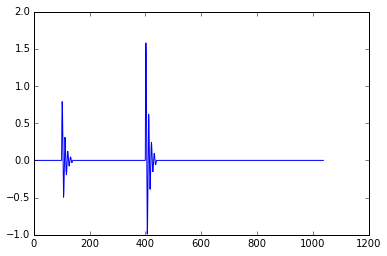

In [42]:
# Now we simulate the signal x[n] passing through a system with impulse response h[n]
# sure enough, we see the impulse response of the system! 
y = np.convolve(x, h)
pylab.plot(y)

# Filter Design

In [67]:
# Create a filter with an impulse response of length 100
# whose passband is between [0, 100] Hz
# for a sampling rate of 1000
Fs = 1000
h = scipy.signal.remez(100, [0.0, 100, 200, 500], [1.0, 0], Hz=Fs)

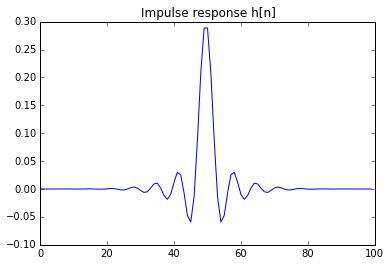

In [69]:
pylab.plot(h)
pylab.title("Impulse response h[n]")

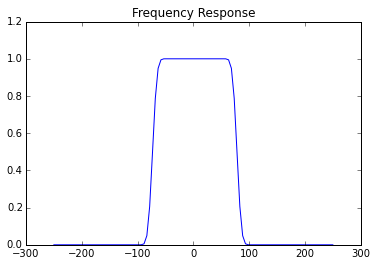

In [71]:
w, H = ft(h, Fs)
pylab.plot(w, np.abs(H))
pylab.title("Frequency Response")